In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Credit-Card-Fraud-Detection/main/creditCardFraud_28011964_120214.csv")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [3]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,167532.467532,1.589411,1.776224,1.604396,34.945055,-0.004995,-0.161838,-0.164835,-0.283716,-0.283716,...,40748.408591,39078.666334,38012.011988,5382.339660,5051.400599,4176.149850,4671.488511,5331.049950,5090.704296,0.213786
std,130587.921320,0.492187,0.750916,0.532298,9.219760,1.173446,1.228732,1.262459,1.184662,1.170224,...,68206.929510,63108.238729,63074.415024,12180.755275,15626.153184,10514.647502,13269.943983,16812.536877,23658.888052,0.410183
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1423.000000,1206.000000,830.000000,1000.000000,390.000000,228.000000,148.000000,189.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17710.000000,17580.000000,15846.000000,2184.000000,1710.000000,1206.000000,1398.000000,1306.000000,1250.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48851.000000,46404.000000,46557.000000,5090.000000,4500.000000,3720.000000,4000.000000,3745.000000,3784.000000,0.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


In [6]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.skew()

LIMIT_BAL                      1.011019
SEX                           -0.364047
EDUCATION                      0.875019
MARRIAGE                      -0.104653
AGE                            0.817570
PAY_0                          1.509158
PAY_2                          1.208410
PAY_3                          1.226851
PAY_4                          1.217037
PAY_5                          1.053218
PAY_6                          1.064620
BILL_AMT1                      2.671027
BILL_AMT2                      2.777126
BILL_AMT3                      2.901497
BILL_AMT4                      3.578203
BILL_AMT5                      3.107180
BILL_AMT6                      2.636691
PAY_AMT1                       7.749893
PAY_AMT2                      10.752948
PAY_AMT3                       6.744377
PAY_AMT4                       7.454775
PAY_AMT5                       7.034632
PAY_AMT6                      15.241538
default payment next month     1.398337
dtype: float64

In [9]:
x = df.drop("default payment next month",axis = 1)
y = df["default payment next month"]

In [10]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
1,50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
2,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
3,100000,2,2,2,23,0,-1,-1,0,0,...,601,221,-159,567,380,601,0,581,1687,1542
4,140000,2,3,1,28,0,0,2,0,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,100000,1,2,1,29,0,0,0,0,-1,...,67782,-2618,95748,101299,3320,5000,0,100000,7186,0
997,200000,2,2,1,28,0,0,0,0,0,...,8441,97041,103541,3632,5000,2000,89000,6500,91,1504
998,90000,2,2,1,40,-1,-1,-1,-1,-1,...,1114,657,1332,780,0,2806,2256,2274,780,0
999,360000,1,1,2,36,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
996     0
997     0
998     0
999     1
1000    1
Name: default payment next month, Length: 1001, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

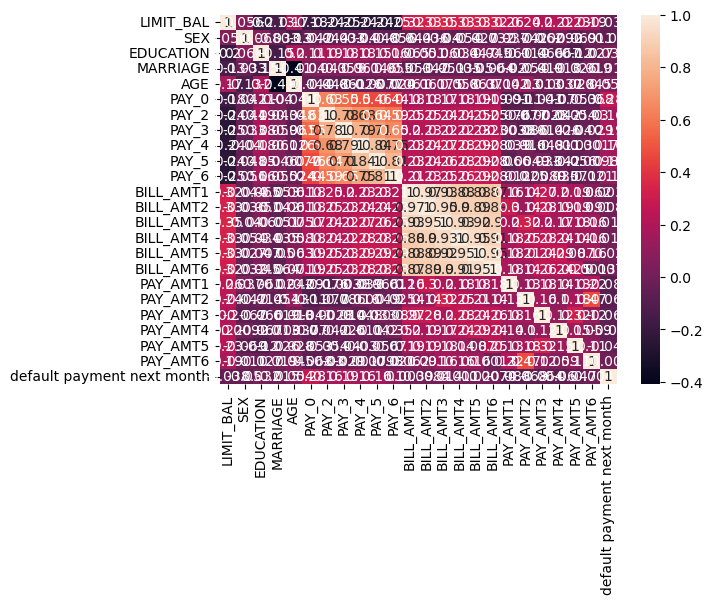

In [13]:
plt.figsize=(15,15)
sns.heatmap(df.corr(), annot=True)
plt.show

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state = 42)
xtrain

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
440,240000,1,1,2,44,0,0,0,0,0,...,234557,200643,194410,198857,12026,9010,7400,8000,8000,7000
482,230000,2,1,1,42,-1,-1,-1,-1,-1,...,13165,0,10500,6992,15111,13165,0,10500,6992,0
422,20000,2,3,2,49,2,2,2,2,0,...,13087,12583,15327,16414,3000,1500,0,3123,1500,1000
852,40000,2,1,2,29,0,0,2,2,2,...,30145,29361,33893,34487,3400,1500,0,5000,1300,0
950,110000,2,2,1,46,-1,-1,-1,-1,-1,...,2161,1719,107591,107940,2151,2161,1719,107591,5000,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,330000,2,1,1,31,0,0,2,0,0,...,105594,105896,106491,107289,9260,0,3593,4100,15794,0
270,360000,2,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
860,200000,1,1,2,32,0,0,0,0,0,...,45574,49022,47459,49666,1739,1756,2662,1726,3000,2500
435,80000,2,1,2,23,0,0,0,0,0,...,57806,37642,46235,47110,3212,1600,956,40000,1800,1700


In [15]:
from sklearn.preprocessing import StandardScaler

train_ss = StandardScaler()
test_ss = StandardScaler()

ss_x_train =  train_ss.fit_transform(xtrain)
ss_x_test = train_ss.fit_transform(xtest)


In [16]:
ss_x_train

array([[ 0.5414973 , -1.19959343, -1.03690208, ...,  0.30029822,
         0.14184692,  0.10485884],
       [ 0.46524541,  0.83361577, -1.03690208, ...,  0.50718682,
         0.08514383, -0.20352712],
       [-1.13604411,  0.83361577,  1.61696065, ..., -0.10330007,
        -0.22379799, -0.15947198],
       ...,
       [ 0.23648977, -1.19959343, -1.03690208, ..., -0.21890942,
        -0.1394184 , -0.09338928],
       [-0.67853282,  0.83361577, -1.03690208, ...,  2.94847233,
        -0.20692207, -0.12863339],
       [-0.67853282,  0.83361577,  0.29002928, ..., -0.26657656,
        -0.24348656, -0.15793005]])

In [17]:
scaled_train_df = pd.DataFrame(ss_x_train,columns = xtrain.columns,index = xtrain.index)
scaled_test_df = pd.DataFrame(ss_x_test,columns = xtest.columns,index = xtest.index)

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

model_nb=GaussianNB()
model_rf=RandomForestClassifier()

model_nb.fit(scaled_train_df , ytrain)
model_rf.fit(scaled_train_df, ytrain)

RandomForestClassifier()

In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

y_pred_nb = model_nb.predict(scaled_test_df)
print(f'Accuracy Score for Naive Bayes : {accuracy_score(ytest, y_pred_nb)}')

y_pred_rf = model_rf.predict(scaled_test_df)
print(f'Accuracy Score for Random Forest : {accuracy_score(ytest, y_pred_rf)}')


Accuracy Score for Naive Bayes : 0.6710963455149501
Accuracy Score for Random Forest : 0.8372093023255814


In [23]:
print(confusion_matrix(ytest,y_pred_nb))
print(classification_report(ytest,y_pred_nb))

[[171  80]
 [ 19  31]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       251
           1       0.28      0.62      0.39        50

    accuracy                           0.67       301
   macro avg       0.59      0.65      0.58       301
weighted avg       0.80      0.67      0.71       301



In [25]:
print(confusion_matrix(ytest,y_pred_rf))
print(classification_report(ytest,y_pred_rf))

[[240  11]
 [ 38  12]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       251
           1       0.52      0.24      0.33        50

    accuracy                           0.84       301
   macro avg       0.69      0.60      0.62       301
weighted avg       0.81      0.84      0.81       301



In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing':[0.1,0.01,0.5,0.005,0.001]}


In [31]:
grid = GridSearchCV(estimator = model_nb, param_grid =param_grid, cv = 5, verbose = 3)

In [34]:
grid.fit(scaled_train_df, ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .................var_smoothing=0.1;, score=0.364 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.764 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.721 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.679 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.714 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.336 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.743 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.693 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.679 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.693 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.5;, score=0.714 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.5;,

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.01, 0.5, 0.005, 0.001]},
             verbose=3)

In [35]:
grid.best_params_

{'var_smoothing': 0.5}

In [36]:
model_nb_new = GaussianNB(var_smoothing = 0.5)
model_nb_new.fit(scaled_train_df , ytrain)
y_pred_nb = model_nb_new.predict(scaled_test_df)
print(f'Accuracy Score for Naive Bayes : {accuracy_score(ytest, y_pred_nb)}')
print(confusion_matrix(ytest,y_pred_nb))
print(classification_report(ytest,y_pred_nb))

Accuracy Score for Naive Bayes : 0.7807308970099668
[[216  35]
 [ 31  19]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       251
           1       0.35      0.38      0.37        50

    accuracy                           0.78       301
   macro avg       0.61      0.62      0.62       301
weighted avg       0.79      0.78      0.78       301

